# Dimensionality reduction 
- In the case of fruit photos, there are 10,000 pixels, so there are 10,000 features 
- Curse of dimensionality 
    - Typical machine learning problems sometimes have thousands to millions of features 
    - Too many features will only slow down training 
- Dimensionality reduction 
    - a method of reducing data size and improving model performance by selecting a few features that best represent the data. 
    - Example) Removing the background part of the image border, combining adjacent pixels, etc.

## Principle Component Analysis (PCA)

- Finding the direction in which the variance in the data is large
    - Dispersion: How spread out the data is.
- In the data shown above, the variance toward the top right is greatest.
- The direction that best describes the original data is the principal component.
    - Because principal components best represent the characteristics of the data, projecting data onto principal components can reduce dimensionality while reducing information loss.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [3]:
fruits = np.load("./fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100 * 100)

In [4]:
# n_components: Number of main components
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
# Check the main components found by pca
print(pca.components_.shape)

(50, 10000)


In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
# Reduce the dimension of the original data to 50 dimensions
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [9]:
# Function to output what data each cluster represents
def draw_fruits(arr):
    n = len(arr) # sample length
    
    # When drawing 10 images per line, calculate the number of rows needed
    rows = int(np.ceil(n / 10))
    cols = 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols * 2, rows * 2), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n: # Visualize only up to n items
                axs[i, j].imshow(arr[i * 10 + j], cmap = "gray_r")
            axs[i, j].axis("off")
    plt.show()

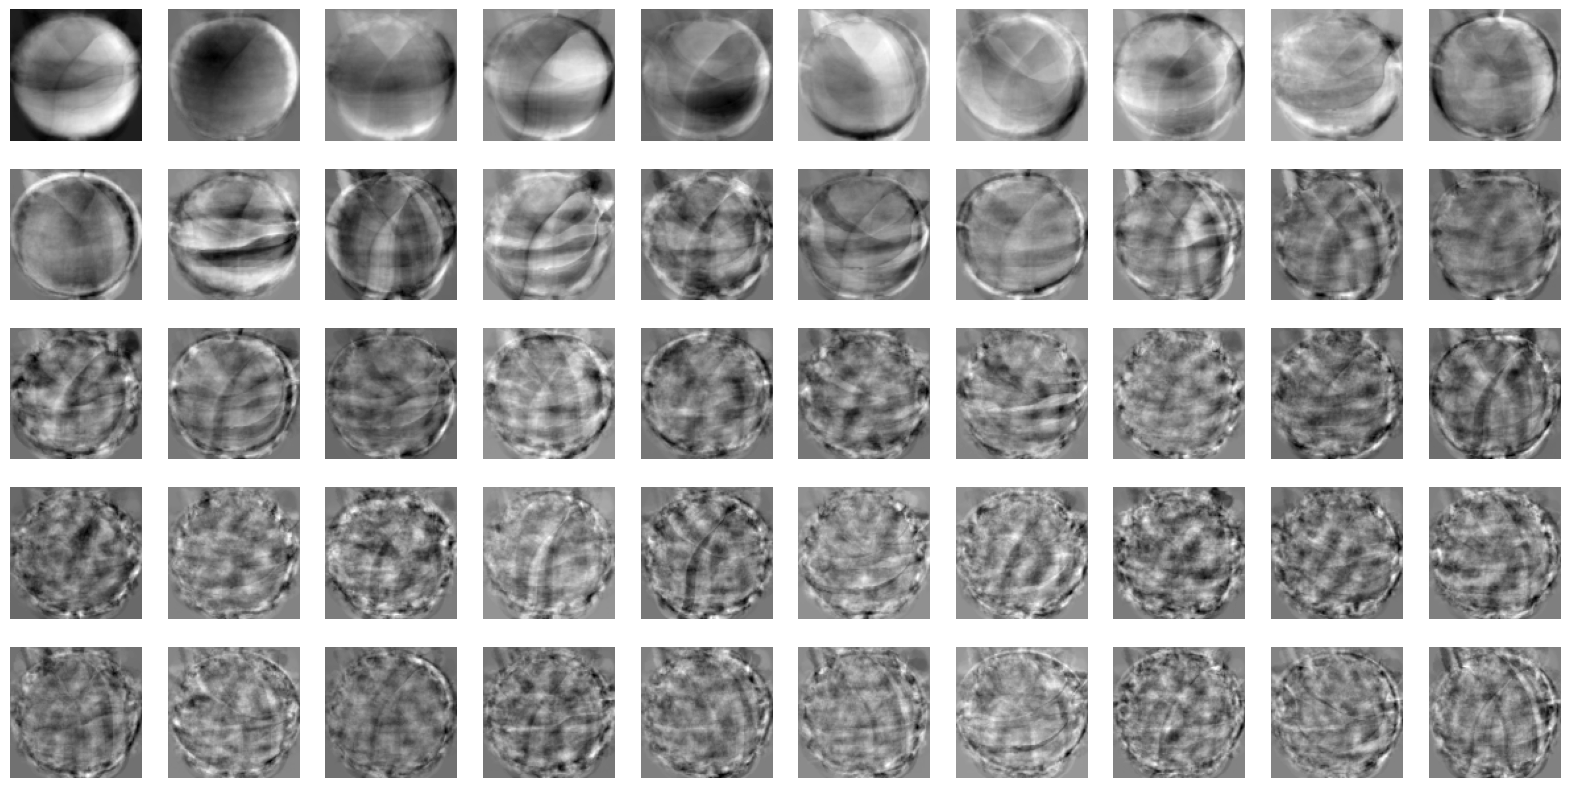

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))